# **Hyperparameter Tuning**
#### In this notebook, we will be implementing hyperparameter tuning and comparing results of two models that will be obtaining after tweaking certain hyperparameters. We will be experimenting with hyperparameters such as batch size and number of neurons. 

# 1. Learning rate α
#### Our main motto while administering learning rate is to minimize loss function. It is advised first to start to with learning_rate = $10^{2}$ and then go with $10^{3}$, $10^{4}$ and so on.

In [ ]:
#'lr' has now been changed to 'learning_rate'
optimizer = tf.keras.optimizers.Adam.(learning_rate = 0.01)

#### An example for exponential decay:

In [ ]:
lr_initial = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(lr_initial,
                                                             decay_steps = 10000,
                                                             decay_rate = 0.99,
                                                             staircase = True)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = lr_schedule),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## 2. Momentum β
#### Usually β is kept between 0.5 and 0.99, which helps you to tweak the gradient descent as such. Momentum acts like a boost or acceleration for many functions like RMSprop, Adagrad etc. 

## 3. Number of hidden layers
#### This hyperparameter varies from model to model. To many hidden layers and hidden units in the same might cause the model to overfit. In the same way, more convoluted hidden layers and fully connected layers improve model's performance. Using few too hidden layers will cause underfitting. Make sure you tweak your model with appropriate number of layers considering constraints like how major work is the model working on, number of training images etc.

## 4. Mini-batch size
#### Batch sizes in powers of 2 are most common. That is 4, 8, 16, 32, 64 and so on. The general rule is to take values 32 onwards as smaller batch size were seen to be less efficient. 

In [ ]:
#code snippet where batch_size comes into picture 
batch_size = 64;
model.fit(x_train, y_train, epochs=100, batch_size=batch_size, callbacks=[print_weights])

## 5. Learning rate decay
#### Learning decay essentially means starting with a particular value of learning_rate and slowly decaying it or reducing it until we reach local minima. 

## 6. Activation function
#### ***Sigmoid***: The non linear activation fucntion called sigmoid or logistic fucntion is popularly used, as its probability output lies between 0 and 1. 
#### $$ h_\theta (x)=\frac{\mathrm{1} }{\mathrm{1} + e^-\theta^Tx }  $$ 

#### ***ReLU***: Rectified Linear Unit has a good advantage when used as its derivative is more faster to compute than the sigmoid function. It also has reduced likelihood of the gradient to vanish. 

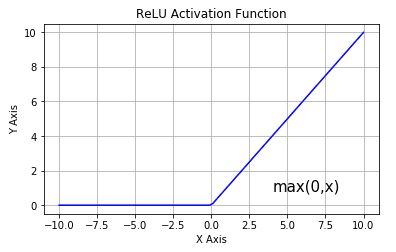

#### ***Hyperbolic Tangent***: This activation too is better than sigmoid fucntion when you are dealing with big data. Derivatives of 'tanh' is larger than sigmoid's, thus minimizing the cost. 



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping

In [2]:
d = datasets.load_digits()
X = d.data
y = d.target

In [3]:
def ANN(optimizer = 'sgd',neurons = 32, batch_size = 64, epochs = 20, activation = 'relu', patience = 2, loss = 'categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))

    model.add(Dense(10,activation='softmax'))  
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)

    history = model.fit(X, pd.get_dummies(y).values, batch_size=batch_size, epochs=epochs, callbacks = [early_stopping], verbose=0) 

    return model

In [4]:
clf = KerasClassifier(build_fn=ANN, verbose=1)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')

38/38 [==============================] - 0s 2ms/step - loss: 0.0973


In [5]:
print("Accuracy of the model is:"+ str(scores.mean()))

Accuracy of the model is:0.9554813578185865


**Accuracy #1 of the model is around 95.548%**

# **Let us try tuning the model**
#### Restart the kernels and run necessary cells above, that is, not the last 3 cells and run the below cells. 

In [3]:
#observe that we have changed the number of neurons and batch size value as well as number of epochs too
def ANN(optimizer = 'sgd',neurons = 128, batch_size = 32, epochs = 30, activation='relu', patience = 3, loss = 'categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))

    model.add(Dense(10,activation='softmax'))  
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)

    history = model.fit(X, pd.get_dummies(y).values, batch_size=batch_size, epochs=epochs, callbacks = [early_stopping], verbose=0) 

    return model

In [4]:
clf = KerasClassifier(build_fn=ANN, verbose=1)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')

38/38 [==============================] - 0s 2ms/step - loss: 0.0065


In [5]:
print("Accuracy of the model is:"+ str(scores.mean()))

Accuracy of the model is:0.9994435169727324


**Accuracy #2 of the model is nearly 100%!!**

### Conclusion:
#### You have observed how changing certain hyperparameters have tweaked or improved the model's performace, bringing it close to 100%! Thus, from this notebook, you have learnt how important it is to implement hyperparameter tuning when you work on more complex dataset so as to improve your model's performance. 